<a href="https://colab.research.google.com/github/sebasbrowar/FisicaComputacional1/blob/main/Actividad7/Actividad7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\text{Actividad 7}$

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

# Bibliotecas para el análisis de Series de Tiempo y Modelos de Pronóstico
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

import pandas.util.testing as tm

# Suprimir mensajes de alertas de cambios futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## $\text{Ejercicio 1}$

Defina las siguientes matrices.

\begin{equation*}
 A
 =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}

\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}

y la matrix identidad

 \begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}

Calcule el resultado de $2*I+3*A+A@B$.

Para definir la matriz identidad, se puede utilizar la función *np.eye(2, dtype=int)*. Ver manual de  [np.eye()](https://numpy.org/doc/stable/reference/generated/numpy.eye.html).

In [ ]:
# Definimos una matriz A
A = np.array([[1,3],[-1,7]])
print(A)

[[ 1  3]
 [-1  7]]


In [ ]:
# Definimos una matriz B
B = np.array([[5,2],[1,2]])
print(B)

[[5 2]
 [1 2]]


In [ ]:
# Matriz identidad
I = np.eye(2, dtype=int)
print(I)

[[1 0]
 [0 1]]


In [ ]:
2*I + 3*A + A@B

array([[13, 17],
       [-1, 35]])

## $\text{Ejercicio 2 - Los polinomios característicos y el Teorema de Cayley-Hamilton}$

El polinomio característico de una matriz M esta dado en general por la ecuación 
\begin{equation}
\det(M - \lambda I) = 0
\end{equation}
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como
\begin{equation}
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
\end{equation}
y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

\begin{equation}
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
\end{equation}

[El Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley–Hamilton_theorem) nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
\begin{equation}
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\end{equation}
y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$. 

Demuestre esto para cualquier matriz M (2x2),  ($\det(M) \neq 0$).

In [ ]:
# Definimos una matriz M 
M = np.array([[1,2],[3,4]])
M_det = la.det(M)
trM = np.trace(M)

print('M = ',M)
print('det(M) = ', M_det)
print('tr(M) = ', trM)

M =  [[1 2]
 [3 4]]
det(M) =  -2.0
tr(M) =  5


In [ ]:
# Matriz identidad
I = np.eye(2, dtype=int)
print(I)

[[1 0]
 [0 1]]


In [ ]:
# Teorema de Cayley-Hamilton, polinomio característico
PM = M_det*I - trM*M + M@M

print(PM)

[[0. 0.]
 [0. 0.]]


## $\text{Ejercicio 3}$

Resuelva el sistema de ecuaciones.

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

### Método de Eliminación Gaussiana

In [ ]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A


In [ ]:
B = np.array([[1,-3,1,1], [3,-4,1,5], [0,2,-1,0]])
print(B)

[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [ ]:
# L1 * -3
B1 = scale_row(B, -3, 0)
print(B1)

[[-3.  9. -3. -3.]
 [ 3. -4.  1.  5.]
 [ 0.  2. -1.  0.]]


In [ ]:
# (L1 * -3) + L2 --- L2
B2 = add_row(B1, 1, 1, 0)
print(B2)

[[-3.  9. -3. -3.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]


In [ ]:
# Regresamos a la L1 original y ahora tenemos la nueva L2
B3 = np.array([[1,-3,1,1], [0,5,-2,2], [0,2,-1,0]])
print(B3)

[[ 1 -3  1  1]
 [ 0  5 -2  2]
 [ 0  2 -1  0]]


In [ ]:
# L2 * -2/5
B4 = scale_row(B3, -2/5, 1)
print(B4)

[[ 1.  -3.   1.   1. ]
 [ 0.  -2.   0.8 -0.8]
 [ 0.   2.  -1.   0. ]]


In [ ]:
# (L2 * -2/5) + L3 --- L3
B5 = add_row(B4, 1, 2, 1)
print(B5)

[[ 1.  -3.   1.   1. ]
 [ 0.  -2.   0.8 -0.8]
 [ 0.   0.  -0.2 -0.8]]


In [ ]:
# Regresamos a la L2 y ahora tenemos la nueva L3
B6 = np.array([[1,-3,1,1], [0,5,-2,2], [0,0,-.2,-.8]])
print(B6)

[[ 1.  -3.   1.   1. ]
 [ 0.   5.  -2.   2. ]
 [ 0.   0.  -0.2 -0.8]]


A partir de esta matriz averiguamos que (-.2)z = -.8 por lo que **z = 4**. \\
Como z = 4, la sustituimos en 5y - 2z = 2, entonces **y = 2**.
Por último, tenemos los valores de "y" y "z", las sustituimos en x -3y + z = 1 y da que **x = 3**.

### Función scipy.linalg.solve()

In [ ]:
Bf = np.array([[1,-3,1], [3,-4,1], [0,2,-1]])
print(Bf)

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]


In [ ]:
m = np.array([[1], [5], [0]])
print(m)

[[1]
 [5]
 [0]]


In [ ]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol = la.solve(Bf, m)
print(x_sol)

[[3.]
 [2.]
 [4.]]


## $\text{Ejercicio 4}$

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre [Eigenvalores y Eigenvectores](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Matrix_examples)) 


\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de *scipy.linalg.eig()*, y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia. 

In [ ]:
A1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
print(A1)

[[2 0 0]
 [0 3 4]
 [0 4 9]]


In [ ]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = la.eig(A1)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


Contrastando con los resultados de wikipedia, los eigenvalores fueron correctos y solo el eigenvector (0,0,1) dio igual. En los otros en vez de 2 dio .4472 y en vez de 1 dio .8944, en wikipedia dice que los eigen vectores son (0,0,1), (1,-2,0) y (2,1,0).

In [ ]:
A2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
print(A2)

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [ ]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = la.eig(A2)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]


En este caso los eigenvalores también fueron correctos, y para los eigenvectores, con el eigenvalor 1 cualquier vector con 3 digitos iguales que no sean ceros es un eigenvector. Pero para los otros con números complejos dieron resultados diferentes. 

In [3]:
A3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(A3)

[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [4]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = la.eig(A3)
print('Eigenvalores:', eigvals)
print('Eigenvectores:', eigvecs)

Eigenvalores: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


Los eigenvalores son 2 y 3, y para los eigenvectores dieron diferentes.

## $\text{Ejercicio 5}$

Se tienen los siguientes 8 puntos: 

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

[[ 0.       0.     ]
 [ 0.5      0.47942]
 [ 1.       0.84147]
 [ 1.5      0.99749]
 [ 2.       0.9093 ]
 [ 2.5      0.59847]
 [ 3.       0.14112]
 [ 3.5     -0.35078]]


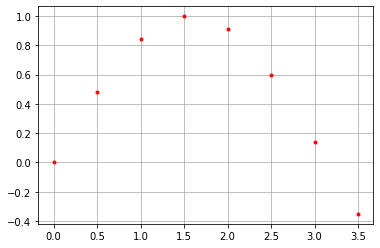

In [56]:
coor = np.array([[0,0],[.5,0.47942],[1,0.84147],[1.5,0.99749],[2,0.90930],[2.5,0.59847],[3,0.14112],[3.5,-.35078]])

x = coor[ :,1]
y = coor[ :,0]

print(coor)

plt.plot(y,x,'r.') 
plt.grid()
plt.show()

In [64]:
# La biblioteca Numpy tambien tiene una función para crear la matriz de Vandermonde
x = coor[ :, 0 ]
X = np.vander(x,increasing=True)
# Sólo imprimimos los primeros 8 renglones y columnas.
print(X[:8,:8])

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02 6.10351562e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.50000000e+00 1.22500000e+01 4.28750000e+01
  1.50062500e+02 5.25218750e+02 1.83826562e+03 6.43392969e+03]]

In [65]:
# Vector y
y = coor[ :,1]
y = np.array(y).reshape(8,1)
print(y)

[[ 0.     ]
 [ 0.47942]
 [ 0.84147]
 [ 0.99749]
 [ 0.9093 ]
 [ 0.59847]
 [ 0.14112]
 [-0.35078]]


In [66]:
# Usamos la función de scipy.linalg.solve(), para encontrar los 8 coeficientes
# de la ecuación lineal Xa=y
a = la.solve(X,y)
print(a)

[[ 0.00000000e+00]
 [ 1.00067181e+00]
 [-3.70788889e-03]
 [-1.58867889e-01]
 [-8.30222222e-03]
 [ 1.31964444e-02]
 [-1.54488889e-03]
 [ 2.46349206e-05]]


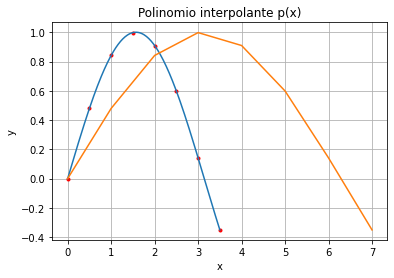

In [82]:
# Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en rojo ('r.')

xs = np.linspace(0,3.5,200)
ys = sum([a[k]*xs**k for k in range(0,N)])
sen = np.sin(x)

plt.plot(x,y,'r.',xs,ys,sen)
plt.grid()

plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## $\text{Ejercicio 6}$

Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones. 


In [84]:
# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/sebasbrowar/FisicaComputacional1/main/Actividad6/2038.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_work0 = df_dist.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_work2 = df_work1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año'] = df_work2['Fecha'].dt.year
df_work2['Mes'] = df_work2['Fecha'].dt.strftime('%b')

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteo = df_work2.copy()

#df_meteo.info()
#print(df_meteo.head())
#print(df_meteo.tail())

# Hacemos una copia del último DataFrame para realizar nuevas operaciones
df_meteo_ts = df_meteo.copy()
# Redefinimos el índice del DataFrame a que sea la variable 'Fecha'
df_meteo_ts = df_meteo_ts.set_index('Fecha')

# Verificamos
df_meteo_ts.info()
#print(df_meteo_ts.head())
#print(df_meteo_ts.tail())

# Seleccionaremos un conjunto de años de 30 años, creando las colecciones de datos 
df_30 = df_meteo_ts[(df_meteo_ts['Año'] >= 1930) & (df_meteo_ts['Año'] < 1960)]
df_60 = df_meteo_ts[(df_meteo_ts['Año'] >= 1960) & (df_meteo_ts['Año'] < 1990)]
df_90 = df_meteo_ts[(df_meteo_ts['Año'] >= 1990) & (df_meteo_ts['Año'] < 2013)]

# Estas 3 colecciones serán nuestras Series de Tiempo (DatFrames) para el análisis

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28868 entries, 1929-01-01 to 2012-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  28843 non-null  float64
 1   Evap    28117 non-null  float64
 2   Tmax    28727 non-null  float64
 3   Tmin    28756 non-null  float64
 4   Año     28868 non-null  int64  
 5   Mes     28868 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.5+ MB
